In [6]:
import pandas as pd

# Load the dataset from the provided Excel file
data = pd.read_excel("MRP Dataset Final.xlsx")

# Display the first few rows of the dataset
data.head()


,Year,2020,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,2021,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,2022,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Crop,Area Harvested in acres,Area Harvested in hectares,Marketed Production in '000lbs,Marketed Production in tonnes,Farm Value in $'000,Average Price in cents/lb,Average Price in $/tonne,Area Harvested in acres,Area Harvested in hectares,...,Farm Value in $'000,Average Price in cents/lb,Average Price in $/tonne,Area Harvested in acres,Area Harvested in hectares,Marketed Production in '000lbs,Marketed Production in tonnes,Farm Value in $'000,Average Price in cents/lb,Average Price in $/tonne
1,Asparagus,3855,1560.06453,16558,7510.591394,32884,198.598865,4378.350289,3722,1506.241292,...,33490,214.048319,4718.952052,4341,1756.741926,15861,7194.437137,35829,225.893702,4980.097723
2,"Beans, Green and Wax b",9590,3880.93874,74810,33933.285555,19444,25.991178,573.006701,9119,3690.331634,...,17230,27.441549,604.981885,9386,3798.382796,66356,30098.611099,25584,38.555669,850.005999
3,Beets,1446,585.175956,37745,17120.864367,4041,10.706054,236.027803,1186,479.957596,...,4898,14.712685,324.358798,1079,436.656194,28155,12770.908365,5170,18.362635,404.826333
4,Broccoli,3712,1502.194432,28790,13058.939863,32327,112.285516,2475.468939,3614,1462.535204,...,32379,110.716362,2440.875055,3206,1297.423316,25654,11636.472499,29370,114.485071,2523.960762


In [7]:
# Extracting the 'Crop' column
crops = data['Year'].tolist()

# Melting the dataset excluding the 'Crop' column from the id_vars
data_long = data.melt(id_vars=["Year"], 
                      value_vars=data.columns[1:], 
                      var_name="Year_Column", 
                      value_name="Value")

# Adding the 'Crop' column to the melted dataset
data_long["Crop"] = crops * len(data.columns[1:])

# Splitting the "Year_Column" into separate "Year" and "Attribute" columns
data_long["Year"] = data_long["Year_Column"].str.split().str[0]
data_long["Attribute"] = data_long["Year_Column"].str.split(n=1).str[1].str.strip()

# Removing the "Year_Column" column as it's no longer needed
data_long.drop("Year_Column", axis=1, inplace=True)

# Pivoting the table to get the attributes as columns
data_pivot = data_long.pivot_table(index=["Year", "Crop"], columns="Attribute", values="Value", aggfunc='first').reset_index()

# Displaying the restructured data
data_pivot.head()

Attribute,Year,Crop,10,11,12,13,14,16,17,18,19,2,20,21,3,4,5,6,7,9
0,Unnamed:,Asparagus,15646,7096.914661,33490,214.048319,4718.952052,1756.741926,15861,7194.437137,35829,1560.06453,225.893702,4980.097723,16558,7510.591394,32884,198.598865,4378.350289,1506.241292
1,Unnamed:,"Beans, Green and Wax b",62788,28480.191598,17230,27.441549,604.981885,3798.382796,66356,30098.611099,25584,3880.93874,38.555669,850.005999,74810,33933.285555,19444,25.991178,573.006701,3690.331634
2,Unnamed:,Beets,33291,15100.561548,4898,14.712685,324.358798,436.656194,28155,12770.908365,5170,585.175956,18.362635,404.826333,37745,17120.864367,4041,10.706054,236.027803,479.957596
3,Unnamed:,Broccoli,29245,13265.324636,32379,110.716362,2440.875055,1297.423316,25654,11636.472499,29370,1502.194432,114.485071,2523.960762,28790,13058.939863,32327,112.285516,2475.468939,1462.535204
4,Unnamed:,Brussels Sprouts,5581,2531.502028,4764,85.361046,1881.886701,273.16305,6680,3030.000635,5262,258.99904,78.772455,1736.633299,6449,2925.220673,4761,73.825399,1627.569518,219.339812


In [8]:
# Renaming columns based on the original dataset
column_mapping = {
    "Year": "Year",
    "Crop": "Crop",
    "2": "Area Harvested (acres)",
    "9": "Area Harvested 2021 (acres)",
    "16": "Area Harvested 2022 (acres)",
    "3": "Marketed Production ('000 lbs)",
    "10": "Marketed Production 2021 ('000 lbs)",
    "17": "Marketed Production 2022 ('000 lbs)",
    "4": "Marketed Production (tonnes)",
    "11": "Marketed Production 2021 (tonnes)",
    "18": "Marketed Production 2022 (tonnes)",
    "5": "Farm Value ($'000)",
    "12": "Farm Value 2021 ($'000)",
    "19": "Farm Value 2022 ($'000)",
    "6": "Average Price (cents/lb)",
    "13": "Average Price 2021 (cents/lb)",
    "20": "Average Price 2022 (cents/lb)",
    "7": "Average Price ($/tonne)",
    "14": "Average Price 2021 ($/tonne)",
    "21": "Average Price 2022 ($/tonne)"
}

# Applying the renaming
data_cleaned = data_pivot.rename(columns=column_mapping)

# Filtering out the rows with 'Unnamed' in the 'Year' column as they are redundant
data_cleaned = data_cleaned[~data_cleaned["Year"].str.contains("Unnamed")]

# Displaying the cleaned data
data_cleaned.head()

Attribute,Year,Crop,Marketed Production 2021 ('000 lbs),Marketed Production 2021 (tonnes),Farm Value 2021 ($'000),Average Price 2021 (cents/lb),Average Price 2021 ($/tonne),Area Harvested 2022 (acres),Marketed Production 2022 ('000 lbs),Marketed Production 2022 (tonnes),Farm Value 2022 ($'000),Area Harvested (acres),Average Price 2022 (cents/lb),Average Price 2022 ($/tonne),Marketed Production ('000 lbs),Marketed Production (tonnes),Farm Value ($'000),Average Price (cents/lb),Average Price ($/tonne),Area Harvested 2021 (acres)


In [13]:
# Assigning correct year values to the 'Year' column
distinct_years = ["2020", "2021", "2022"]

# Correctly setting the 'Year' values based on the total rows and number of distinct years
rows_per_year = len(data_pivot) // len(distinct_years)
data_pivot["Year"] = sum([[year] * rows_per_year for year in distinct_years], [])

# Applying the renaming again
data_cleaned = data_pivot.rename(columns=column_mapping)

# Displaying the cleaned data
data_cleaned.head()

Attribute,Year,Crop,Marketed Production 2021 ('000 lbs),Marketed Production 2021 (tonnes),Farm Value 2021 ($'000),Average Price 2021 (cents/lb),Average Price 2021 ($/tonne),Area Harvested 2022 (acres),Marketed Production 2022 ('000 lbs),Marketed Production 2022 (tonnes),Farm Value 2022 ($'000),Area Harvested (acres),Average Price 2022 (cents/lb),Average Price 2022 ($/tonne),Marketed Production ('000 lbs),Marketed Production (tonnes),Farm Value ($'000),Average Price (cents/lb),Average Price ($/tonne),Area Harvested 2021 (acres)
0,2020,Asparagus,15646,7096.914661,33490,214.048319,4718.952052,1756.741926,15861,7194.437137,35829,1560.06453,225.893702,4980.097723,16558,7510.591394,32884,198.598865,4378.350289,1506.241292
1,2020,"Beans, Green and Wax b",62788,28480.191598,17230,27.441549,604.981885,3798.382796,66356,30098.611099,25584,3880.93874,38.555669,850.005999,74810,33933.285555,19444,25.991178,573.006701,3690.331634
2,2020,Beets,33291,15100.561548,4898,14.712685,324.358798,436.656194,28155,12770.908365,5170,585.175956,18.362635,404.826333,37745,17120.864367,4041,10.706054,236.027803,479.957596
3,2020,Broccoli,29245,13265.324636,32379,110.716362,2440.875055,1297.423316,25654,11636.472499,29370,1502.194432,114.485071,2523.960762,28790,13058.939863,32327,112.285516,2475.468939,1462.535204
4,2020,Brussels Sprouts,5581,2531.502028,4764,85.361046,1881.886701,273.16305,6680,3030.000635,5262,258.99904,78.772455,1736.633299,6449,2925.220673,4761,73.825399,1627.569518,219.339812


In [14]:
# Displaying summary statistics for the dataset
summary_statistics = data_cleaned.describe(include='all')

summary_statistics

Attribute,Year,Crop,Marketed Production 2021 ('000 lbs),Marketed Production 2021 (tonnes),Farm Value 2021 ($'000),Average Price 2021 (cents/lb),Average Price 2021 ($/tonne),Area Harvested 2022 (acres),Marketed Production 2022 ('000 lbs),Marketed Production 2022 (tonnes),Farm Value 2022 ($'000),Area Harvested (acres),Average Price 2022 (cents/lb),Average Price 2022 ($/tonne),Marketed Production ('000 lbs),Marketed Production (tonnes),Farm Value ($'000),Average Price (cents/lb),Average Price ($/tonne),Area Harvested 2021 (acres)
count,39,39,39,39.000000,39,39.000000,39.000000,39.000000,39,39.000000,39,39.00000,39.000000,39.000000,39,39.000000,39,39.000000,39.000000,39.000000
unique,3,39,39,39.000000,39,39.000000,39.000000,39.000000,39,39.000000,39,38.00000,39.000000,39.000000,39,39.000000,39,39.000000,39.000000,39.000000
top,2020,Asparagus,15646,7096.914661,33490,214.048319,4718.952052,1756.741926,15861,7194.437137,35829,258.99904,225.893702,4980.097723,16558,7510.591394,32884,198.598865,4378.350289,1506.241292
freq,13,1,1,1.000000,1,1.000000,1.000000,1.000000,1,1.000000,1,2.00000,1.000000,1.000000,1,1.000000,1,1.000000,1.000000,1.000000


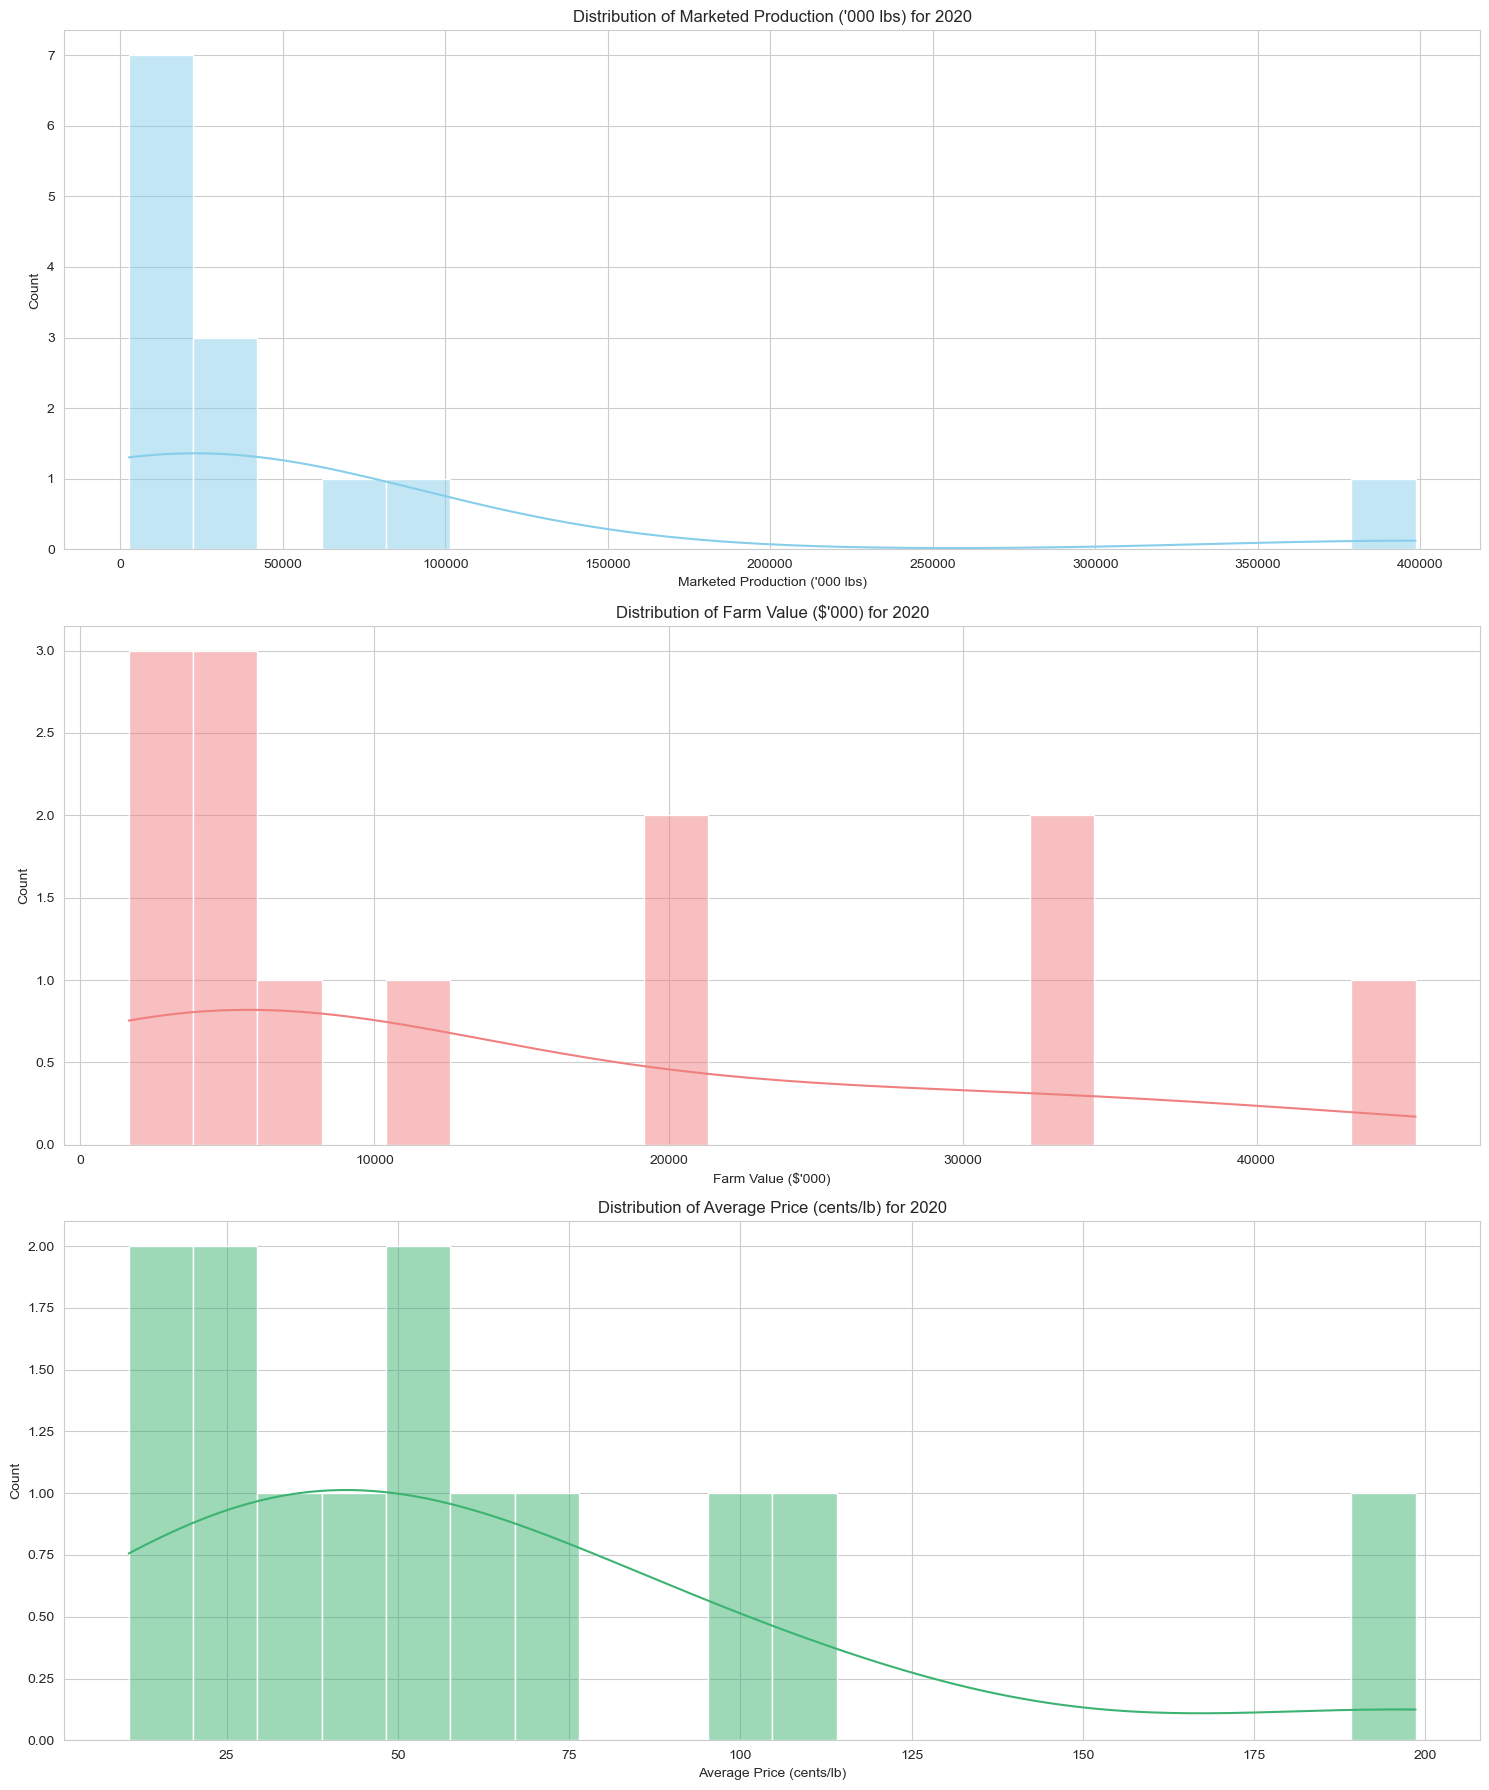

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style for the plots
sns.set_style("whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))

# Plotting histograms for the three columns
sns.histplot(data_cleaned[data_cleaned["Year"] == "2020"]["Marketed Production ('000 lbs)"].astype(float), ax=axes[0], bins=20, color="skyblue", kde=True)
axes[0].set_title("Distribution of Marketed Production ('000 lbs) for 2020")
axes[0].set_xlabel("Marketed Production ('000 lbs)")
axes[0].set_ylabel("Count")

sns.histplot(data_cleaned[data_cleaned["Year"] == "2020"]["Farm Value ($'000)"].astype(float), ax=axes[1], bins=20, color="lightcoral", kde=True)
axes[1].set_title("Distribution of Farm Value ($'000) for 2020")
axes[1].set_xlabel("Farm Value ($'000)")
axes[1].set_ylabel("Count")

sns.histplot(data_cleaned[data_cleaned["Year"] == "2020"]["Average Price (cents/lb)"].astype(float), ax=axes[2], bins=20, color="mediumseagreen", kde=True)
axes[2].set_title("Distribution of Average Price (cents/lb) for 2020")
axes[2].set_xlabel("Average Price (cents/lb)")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

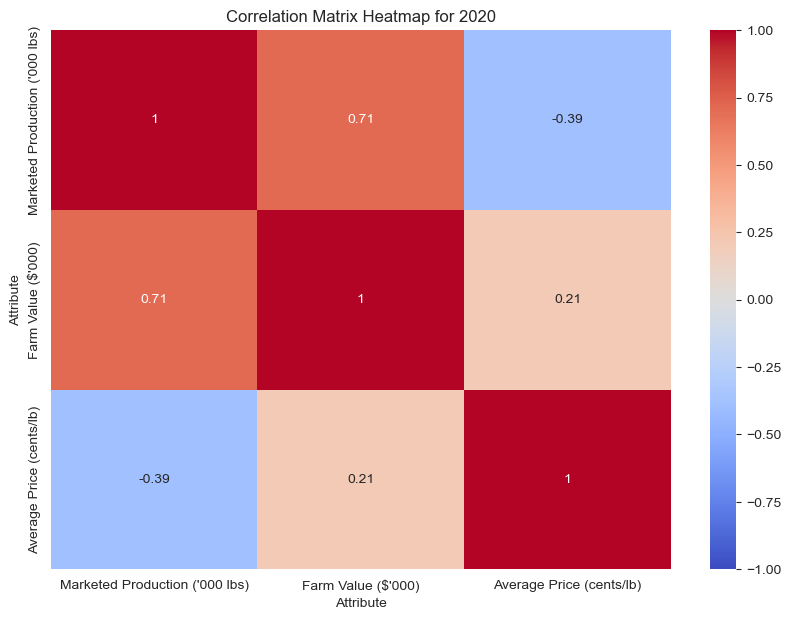

In [16]:
# Filtering the data for the year 2020
data_2020 = data_cleaned[data_cleaned["Year"] == "2020"]

# Selecting the columns for correlation
columns_for_correlation = ["Marketed Production ('000 lbs)", "Farm Value ($'000)", "Average Price (cents/lb)"]
correlation_data = data_2020[columns_for_correlation].astype(float)

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap for 2020")
plt.show()

In [17]:
# Handling missing values
missing_data = data_cleaned.isnull().sum()

# Checking for columns with missing values
missing_data[missing_data > 0]

Series([], dtype: int64)

In [20]:
# Identifying rows with non-numeric string values
non_numeric_rows = data_cleaned[columns_to_convert].applymap(lambda x: not isinstance(x, (int, float)))

# Displaying the rows with non-numeric values
non_numeric_values = data_cleaned[non_numeric_rows.any(axis=1)]
non_numeric_values

Attribute,Year,Crop,Marketed Production 2021 ('000 lbs),Marketed Production 2021 (tonnes),Farm Value 2021 ($'000),Average Price 2021 (cents/lb),Average Price 2021 ($/tonne),Area Harvested 2022 (acres),Marketed Production 2022 ('000 lbs),Marketed Production 2022 (tonnes),Farm Value 2022 ($'000),Area Harvested (acres),Average Price 2022 (cents/lb),Average Price 2022 ($/tonne),Marketed Production ('000 lbs),Marketed Production (tonnes),Farm Value ($'000),Average Price (cents/lb),Average Price ($/tonne),Area Harvested 2021 (acres)
15,2021,Crop,Marketed Production in '000lbs,Marketed Production in tonnes,Farm Value in $'000,Average Price in cents/lb,Average Price in $/tonne,Area Harvested in hectares,Marketed Production in '000lbs,Marketed Production in tonnes,Farm Value in $'000,Area Harvested in hectares,Average Price in cents/lb,Average Price in $/tonne,Marketed Production in '000lbs,Marketed Production in tonnes,Farm Value in $'000,Average Price in cents/lb,Average Price in $/tonne,Area Harvested in hectares


In [22]:
# Removing the row with non-numeric values
data_cleaned = data_cleaned.drop(non_numeric_values.index)

# Converting the columns to float data type
for column in columns_to_convert:
    data_cleaned[column] = data_cleaned[column].astype(float)

# Verifying the data types again
data_cleaned.dtypes

Attribute
Year                                    object
Crop                                    object
Marketed Production 2021 ('000 lbs)    float64
Marketed Production 2021 (tonnes)      float64
Farm Value 2021 ($'000)                float64
Average Price 2021 (cents/lb)          float64
Average Price 2021 ($/tonne)           float64
Area Harvested 2022 (acres)             object
Marketed Production 2022 ('000 lbs)    float64
Marketed Production 2022 (tonnes)      float64
Farm Value 2022 ($'000)                float64
Area Harvested (acres)                  object
Average Price 2022 (cents/lb)          float64
Average Price 2022 ($/tonne)           float64
Marketed Production ('000 lbs)         float64
Marketed Production (tonnes)           float64
Farm Value ($'000)                     float64
Average Price (cents/lb)               float64
Average Price ($/tonne)                float64
Area Harvested 2021 (acres)             object
dtype: object

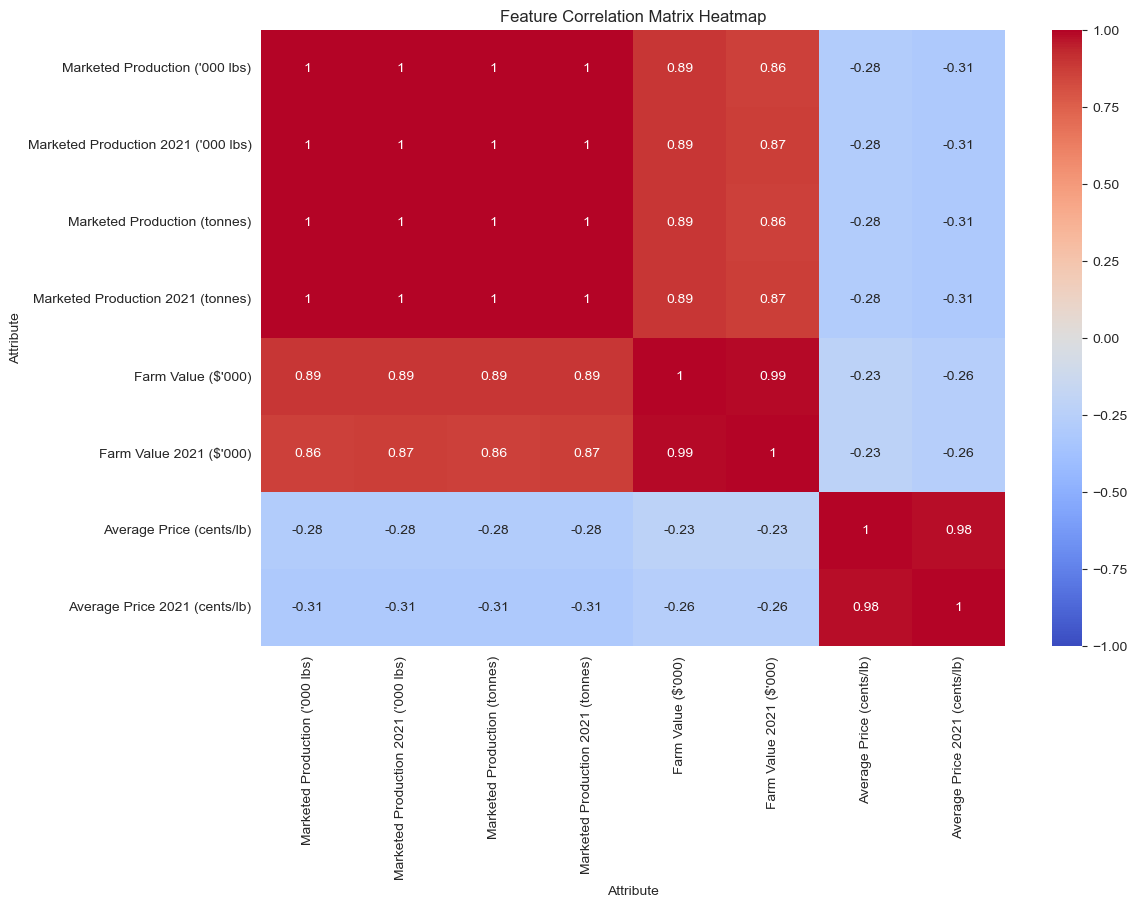

In [23]:
# Selecting the features for correlation
features = [
    "Marketed Production ('000 lbs)",
    "Marketed Production 2021 ('000 lbs)",
    "Marketed Production (tonnes)",
    "Marketed Production 2021 (tonnes)",
    "Farm Value ($'000)",
    "Farm Value 2021 ($'000)",
    "Average Price (cents/lb)",
    "Average Price 2021 (cents/lb)"
]

# Extracting the correlation matrix for the selected features
feature_correlation_matrix = data_cleaned[features].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix Heatmap")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets based on the year
train_data = data_cleaned[data_cleaned["Year"].isin(["2020", "2021"])]
test_data = data_cleaned[data_cleaned["Year"] == "2022"]

# Separating the features and the target variable for the training set
X_train = train_data[features].drop("Average Price 2021 (cents/lb)", axis=1)
y_train = train_data["Average Price 2021 (cents/lb)"]

# Adjusting the features for the test set
test_features = features.copy()
if "Average Price 2022 (cents/lb)" in test_features:
    test_features.remove("Average Price 2022 (cents/lb)")

# Separating the features for the test set
X_test = test_data[test_features]

# Defining the target variable for the test set
y_test = test_data["Average Price 2022 (cents/lb)"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25, 7), (25,), (13, 8), (13,))

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

mae, rmse

(6.687368452762135, 9.858364573049974)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Initializing the Linear Regression model
lr_regressor = LinearRegression()

# Training the model
lr_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = lr_regressor.predict(X_test)

# Evaluating the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

# Initializing the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training the model
gb_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = gb_regressor.predict(X_test)

# Evaluating the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)

mae_lr, rmse_lr, mae_gb, rmse_gb

(8.327555946478217, 13.224606449151038, 8.600742924514822, 14.20391221168804)

In [35]:
# Compiling the performance metrics for all models
model_comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Gradient Boosting'],
    'MAE': [mae, mae_lr, mae_gb],
    'RMSE': [rmse, rmse_lr, rmse_gb]
})

# Displaying the comparison
model_comparison_df.sort_values(by='MAE')

,Model,MAE,RMSE
0,Random Forest,6.687368,9.858365
1,Linear Regression,8.327556,13.224606
2,Gradient Boosting,8.600743,14.203912


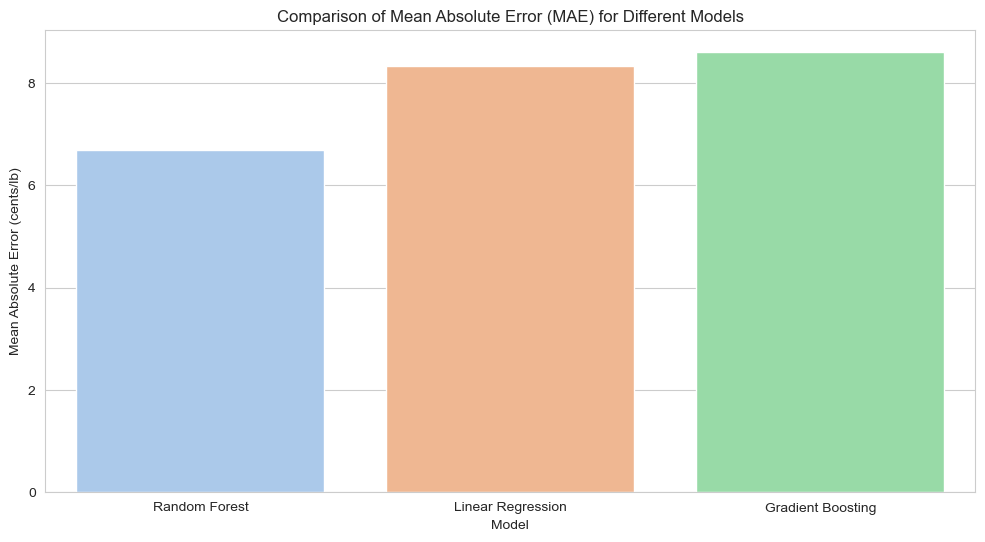

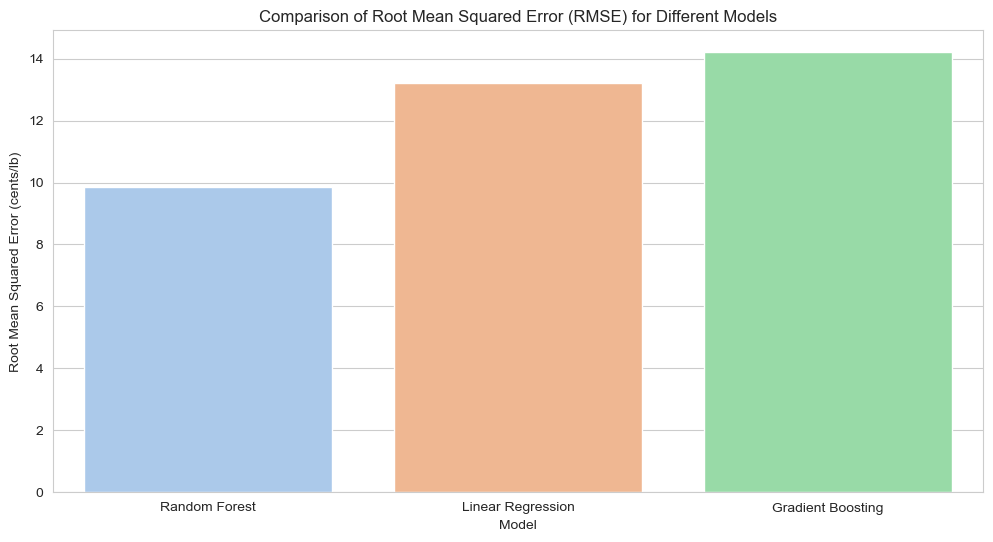

In [36]:
# Plotting the comparison of performance metrics for the models
plt.figure(figsize=(12, 6))

# Bar plot for MAE
sns.barplot(x='Model', y='MAE', data=model_comparison_df, palette='pastel')
plt.title('Comparison of Mean Absolute Error (MAE) for Different Models')
plt.ylabel('Mean Absolute Error (cents/lb)')
plt.xlabel('Model')
plt.show()

# Bar plot for RMSE
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=model_comparison_df, palette='pastel')
plt.title('Comparison of Root Mean Squared Error (RMSE) for Different Models')
plt.ylabel('Root Mean Squared Error (cents/lb)')
plt.xlabel('Model')
plt.show()

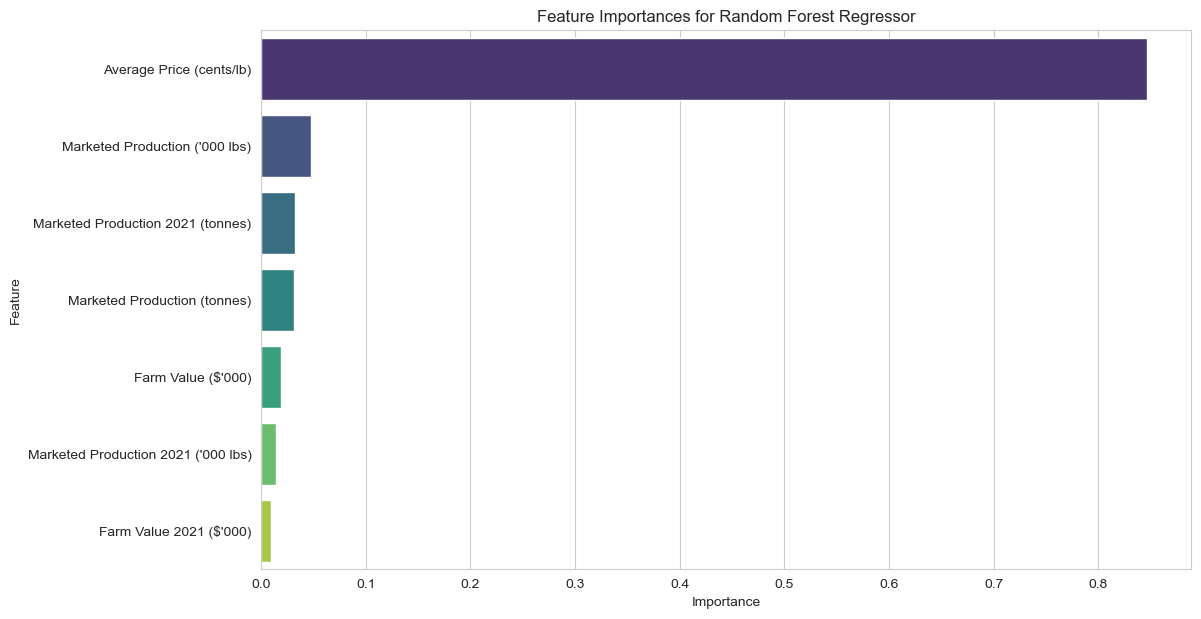

In [37]:
# Extracting feature importances
feature_importances = rf_regressor.feature_importances_

# Creating a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df, palette="viridis")
plt.title('Feature Importances for Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

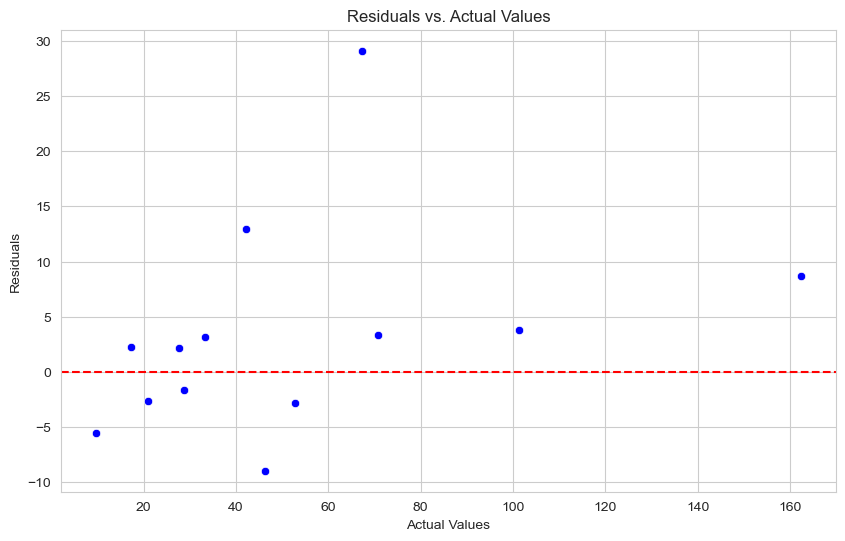

In [38]:
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, color="blue")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

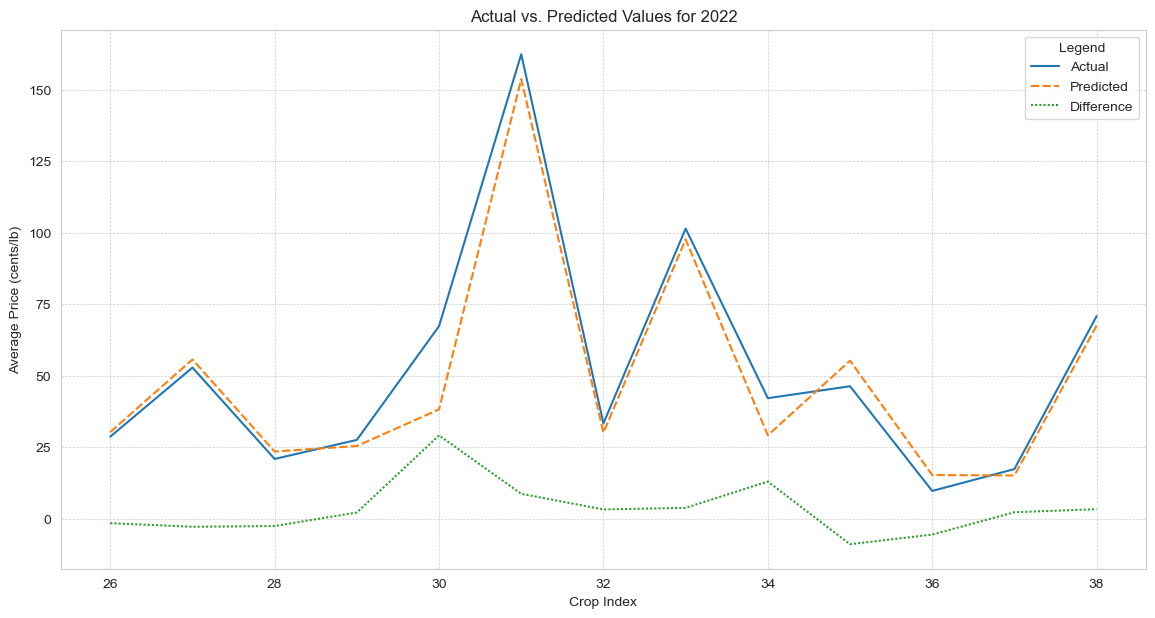

In [39]:
# Comparing actual vs. predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': residuals
})

# Plotting the comparison
plt.figure(figsize=(14, 7))
sns.lineplot(data=comparison_df)
plt.title("Actual vs. Predicted Values for 2022")
plt.ylabel("Average Price (cents/lb)")
plt.xlabel("Crop Index")
plt.legend(title="Legend")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [40]:
# Adjusting the training data to predict 2023 prices
train_data_2023 = data_cleaned[data_cleaned["Year"].isin(["2021", "2022"])]

# Separating the features and the target variable for the new training set
X_train_2023 = train_data_2023[features].drop("Average Price 2021 (cents/lb)", axis=1)
y_train_2023 = train_data_2023["Average Price 2022 (cents/lb)"]

# Step 2: Model Training
# Initializing and training a new Random Forest Regressor for 2023 prediction
rf_regressor_2023 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_2023.fit(X_train_2023, y_train_2023)

# Confirming that the model has been trained
"Model trained successfully."

'Model trained successfully.'

In [41]:
# Preparing the features for 2023 prediction
X_2023 = test_data[features].drop("Average Price 2021 (cents/lb)", axis=1)

# Confirming that the feature set for 2023 has been prepared
"Feature set for 2023 prediction prepared successfully."

'Feature set for 2023 prediction prepared successfully.'

In [42]:
# Step 4: Prediction for 2023
# Predicting the average prices for 2023 using the trained model
predicted_prices_2023_final = rf_regressor_2023.predict(X_2023)

# Creating a DataFrame with crop names and the final predicted prices
predicted_prices_2023_final_df = pd.DataFrame({
    'Crop': test_data['Crop'],
    'Predicted Average Price 2023 (cents/lb)': predicted_prices_2023_final
})

predicted_prices_2023_final_df.head()

,Crop,Predicted Average Price 2023 (cents/lb)
26,"Peas, Green",30.259106
27,Peppers,47.957358
28,Pumpkins,24.195902
29,Pumpkins and Squash f,27.101871
30,Radishes,59.952471


In [43]:
# Exporting the final predictions for 2023 to an Excel file
predicted_prices_2023_final_df.to_excel("predicted_prices_2023_final.xlsx", index=False)

predicted_prices_2023_final_df.head()

,Crop,Predicted Average Price 2023 (cents/lb)
26,"Peas, Green",30.259106
27,Peppers,47.957358
28,Pumpkins,24.195902
29,Pumpkins and Squash f,27.101871
30,Radishes,59.952471
